## Install to Use Keras Plot Model

#### Restart run session after installation

In [1]:
pip install pydot

In [2]:
pip install graphviz

## Import the Relevant Libraries

In [3]:
# TensorFlow is a library containing multiple machine learning tasks
import tensorflow as tf

In [4]:
# Keras, a high-level neural networks API, that runs on top of TensorFlow
# Enables building deep neural networks
from tensorflow import keras

In [5]:
# Check what device is in use – CPU, GPU or TPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15439812886828618064
xla_global_id: -1
, name: "/device:TPU_SYSTEM:0"
device_type: "TPU_SYSTEM"
memory_limit: 8589934592
locality {
}
incarnation: 9878933870773481635
physical_device_desc: "device: TPU_SYSTEM device"
xla_global_id: -1
, name: "/device:TPU:0"
device_type: "TPU"
memory_limit: 17179869184
locality {
}
incarnation: 13899669711709170219
physical_device_desc: "device: TPU device"
xla_global_id: -1
, name: "/device:TPU:1"
device_type: "TPU"
memory_limit: 17179869184
locality {
}
incarnation: 2454624585336311678
physical_device_desc: "device: TPU device"
xla_global_id: -1
, name: "/device:TPU:2"
device_type: "TPU"
memory_limit: 17179869184
locality {
}
incarnation: 15227081404455476661
physical_device_desc: "device: TPU device"
xla_global_id: -1
, name: "/device:TPU:3"
device_type: "TPU"
memory_limit: 17179869184
locality {
}
incarnation: 17680593465260144611
physical_device_desc: "devi

In [6]:
# Import the backend module from TensorFlow's Keras API and aliases it as K
from tensorflow.keras import backend as K

In [7]:
# Ensure the Keras session are cleared
K.clear_session()

In [8]:
# Used to instantiate a Keras tensor
from keras import Input

In [9]:
# Layers are the basic building blocks of neural networks in Keras
from keras import layers

In [10]:
# Allows for creation of neural network models
from keras.models import Model

In [11]:
# Allows for generation of tf.data.Dataset from image files in a directory
from tensorflow.keras.utils import image_dataset_from_directory

In [12]:
# Provides various algorithms for optimizing neural network training, such as SGD, Adam, RMSprop, etc.
from keras import optimizers

In [13]:
# Allows for implementation of early stopping in callbacks
from keras.callbacks import EarlyStopping

In [14]:
# Allows for implementation of reduce learning rate on plateau in callbacks
from keras.callbacks import ReduceLROnPlateau

In [15]:
# Allows for implementation of model check points in callbacks
from keras.callbacks import ModelCheckpoint

In [16]:
# Allows for implementation of TensorBoard in callbacks
from keras.callbacks import TensorBoard

In [17]:
# Needed for TensorBoard
import datetime

In [18]:
# Allows for the computation of the cross-entropy loss between true labels and predicted labels
from keras import losses

In [19]:
# Allows for judging the performance of the model
from keras import metrics

In [20]:
# Allows for defining a parallel dataset using Python code
from tensorflow.keras.utils import Sequence

In [21]:
# Allows for plotting of figures
import matplotlib.pyplot as plt

In [22]:
# Allows for plotting of confusion matrix heatmap
import seaborn as sns

In [23]:
# Allows for creating of classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
# Allows for the use of np.concatenate for the y-true values
import numpy as np

## Variables in Use

In [25]:
# Define image width and height
size_w = 768
size_h = 768

# Define the batch size used
bch_size = 8

# Define seed used for shuffle
shuf_seed = 7

# Define the interpolation used
inter_pol = "lanczos5"

## Creating the Model with Keras API

In [26]:
# Input CC view
input_cc = Input(shape = (size_h, size_w, 1), name = "input_cc")

# Rescale
image_rescale_cc = layers.Rescaling(scale = 1./255, name = "image_rescale_cc")(input_cc)


# ..............................................
# First convolutional layer
conv_1_cc = layers.Conv2D(16, kernel_size = (3, 3), activation = "relu", strides = (1, 1), padding = "same", name = "conv_1_cc")(image_rescale_cc)
conv_1_cc = layers.BatchNormalization(name = "bn_1_cc")(conv_1_cc)

max_1_cc = layers.MaxPooling2D(pool_size = (2, 2), padding = "same", name = "max_1_cc")(conv_1_cc)


# ..............................................
# Second convolutional layer
conv_2_cc_1 = layers.Conv2D(32, kernel_size = (3, 3), activation = "relu", strides = (1, 1), padding = "same", name = "conv_2_cc_1")(max_1_cc)
conv_2_cc_1 = layers.BatchNormalization(name = "bn_2_cc_1")(conv_2_cc_1)

conv_2_cc_2 = layers.Conv2D(32, kernel_size = (3, 3), activation = "relu", strides = (1, 1), padding = "same", name = "conv_2_cc_2")(conv_2_cc_1)
conv_2_cc_2 = layers.BatchNormalization(name = "bn_2_cc_2")(conv_2_cc_2)

conv_2_cc = layers.Add(name = "add_1_cc")([conv_2_cc_1, conv_2_cc_2])

max_2_cc = layers.MaxPooling2D(pool_size = (2, 2), name = "max_2_cc")(conv_2_cc)


# ..............................................
# Third convolutional layer
conv_3_cc_1 = layers.Conv2D(64, kernel_size = (3, 3), activation = "relu", strides = (1, 1), padding = "same", name = "conv_3_cc_1")(max_2_cc)
conv_3_cc_1 = layers.BatchNormalization(name = "bn_3_cc_1")(conv_3_cc_1)

conv_3_cc_2 = layers.Conv2D(64, kernel_size = (3, 3), activation = "relu", strides = (1, 1), padding = "same", name = "conv_3_cc_2")(conv_3_cc_1)
conv_3_cc_2 = layers.BatchNormalization(name = "bn_3_cc_2")(conv_3_cc_2)

conv_3_cc = layers.Add(name = "add_2_cc")([conv_3_cc_1, conv_3_cc_2])

max_3_cc = layers.MaxPooling2D(pool_size = (2, 2), name = "max_3_cc")(conv_3_cc)


# ..............................................
# Fourth convolutional layer
conv_4_cc_1 = layers.Conv2D(128, kernel_size = (3, 3), activation = "relu", strides = (2, 2), padding = "same", name = "conv_4_cc_1")(max_3_cc)
conv_4_cc_1 = layers.BatchNormalization(name = "bn_4_cc_1")(conv_4_cc_1)

conv_4_cc_2 = layers.Conv2D(128, kernel_size = (3, 3), activation = "relu", strides = (1, 1), padding = "same", name = "conv_4_cc_2")(conv_4_cc_1)
conv_4_cc_2 = layers.BatchNormalization(name = "bn_4_cc_2")(conv_4_cc_2)

conv_4_cc = layers.Add(name = "add_3_cc")([conv_4_cc_1, conv_4_cc_2])

max_4_cc = layers.MaxPooling2D(pool_size = (2, 2), name = "max_4_cc")(conv_4_cc)


# ..............................................
# Fifth convolutional layer
conv_5_cc_1 = layers.Conv2D(256, kernel_size = (3, 3), activation = "relu", strides = (2, 2), padding = "same", name = "conv_5_cc_1")(max_4_cc)
conv_5_cc_1 = layers.BatchNormalization(name = "bn_5_cc_1")(conv_5_cc_1)

conv_5_cc_2 = layers.Conv2D(256, kernel_size = (3, 3), activation = "relu", strides = (1, 1), padding = "same", name = "conv_5_cc_2")(conv_5_cc_1)
conv_5_cc_2 = layers.BatchNormalization(name = "bn_5_cc_2")(conv_5_cc_2)

conv_5_cc = layers.Add(name = "add_4_cc")([conv_5_cc_1, conv_5_cc_2])

max_5_cc = layers.MaxPooling2D(pool_size = (2, 2), name = "max_5_cc")(conv_5_cc)




# -----------------------------------------------------------------------------------------------------------------
# Input MLO view
input_mlo = Input(shape = (size_h, size_w, 1), name = "input_mlo")

# Rescale
image_rescale_mlo = layers.Rescaling(scale = 1./255, name = "image_rescale_mlo")(input_mlo)


# ..............................................
# First convolutional layer
conv_1_mlo = layers.Conv2D(16, kernel_size = (3, 3), activation = "relu", strides = (1, 1), padding = "same", name = "conv_1_mlo")(image_rescale_mlo)
conv_1_mlo = layers.BatchNormalization(name = "bn_1_mlo")(conv_1_mlo)

max_1_mlo = layers.MaxPooling2D((3, 3), strides = (2, 2), padding = "same", name = "max_1_mlo")(conv_1_mlo)


# ..............................................
# Second convolutional layer
conv_2_mlo_1 = layers.Conv2D(32, kernel_size = (3, 3), activation = "relu", strides = (1, 1), padding = "same", name = "conv_2_mlo_1")(max_1_mlo)
conv_2_mlo_1 = layers.BatchNormalization(name = "bn_2_mlo_1")(conv_2_mlo_1)

conv_2_mlo_2 = layers.Conv2D(32, kernel_size = (3, 3), activation = "relu", strides = (1, 1), padding = "same", name = "conv_2_mlo_2")(conv_2_mlo_1)
conv_2_mlo_2 = layers.BatchNormalization(name = "bn_2_mlo_2")(conv_2_mlo_2)

conv_2_mlo = layers.Add(name = "add_1_mlo")([conv_2_mlo_1, conv_2_mlo_2])

max_2_mlo = layers.MaxPooling2D(pool_size = (2, 2), name = "max_2_mlo")(conv_2_mlo)


# ..............................................
# Third convolutional layer
conv_3_mlo_1 = layers.Conv2D(64, kernel_size = (3, 3), activation = "relu", strides = (1, 1), padding = "same", name = "conv_3_mlo_1")(max_2_mlo)
conv_3_mlo_1 = layers.BatchNormalization(name = "bn_3_mlo_1")(conv_3_mlo_1)

conv_3_mlo_2 = layers.Conv2D(64, kernel_size = (3, 3), activation = "relu", strides = (1, 1), padding = "same", name = "conv_3_mlo_2")(conv_3_mlo_1)
conv_3_mlo_2 = layers.BatchNormalization(name = "bn_3_mlo_2")(conv_3_mlo_2)

conv_3_mlo = layers.Add(name = "add_2_mlo")([conv_3_mlo_1, conv_3_mlo_2])

max_3_mlo = layers.MaxPooling2D(pool_size = (2, 2), name = "max_3_mlo")(conv_3_mlo)


# ..............................................
# Fourth convolutional layer
conv_4_mlo_1 = layers.Conv2D(128, kernel_size = (3, 3), activation = "relu", strides = (2, 2), padding = "same", name = "conv_4_mlo_1")(max_3_mlo)
conv_4_mlo_1 = layers.BatchNormalization(name = "bn_4_mlo_1")(conv_4_mlo_1)

conv_4_mlo_2 = layers.Conv2D(128, kernel_size = (3, 3), activation = "relu", strides = (1, 1), padding = "same", name = "conv_4_mlo_2")(conv_4_mlo_1)
conv_4_mlo_2 = layers.BatchNormalization(name = "bn_4_mlo_2")(conv_4_mlo_2)

conv_4_mlo = layers.Add(name = "add_3_mlo")([conv_4_mlo_1, conv_4_mlo_2])

max_4_mlo = layers.MaxPooling2D(pool_size = (2, 2), name = "max_4_mlo")(conv_4_mlo)


# ..............................................
# Fifth convolutional layer
conv_5_mlo_1 = layers.Conv2D(256, kernel_size = (3, 3), activation = "relu", strides = (2, 2), padding = "same", name = "conv_5_mlo_1")(max_4_mlo)
conv_5_mlo_1 = layers.BatchNormalization(name = "bn_5_mlo_1")(conv_5_mlo_1)

conv_5_mlo_2 = layers.Conv2D(256, kernel_size = (3, 3), activation = "relu", strides = (1, 1), padding = "same", name = "conv_5_mlo_2")(conv_5_mlo_1)
conv_5_mlo_2 = layers.BatchNormalization(name = "bn_5_mlo_2")(conv_5_mlo_2)

conv_5_mlo = layers.Add(name = "add_4_mlo")([conv_5_mlo_1, conv_5_mlo_2])

max_5_mlo = layers.MaxPooling2D(pool_size = (2, 2), name = "max_5_mlo")(conv_5_mlo)




# -----------------------------------------------------------------------------------------------------------------
# Combine the output of the two branches
combined = layers.Concatenate(axis = 1, name = "combine")([max_5_cc, max_5_mlo])




# -----------------------------------------------------------------------------------------------------------------
# Add a classifier
# Flattening layer
flat = layers.Flatten(name = "flatten")(combined)

# Dense 1 layer
den_1 = layers.Dense(512, activation = "relu", name = "dense_1")(flat)
bn_den_1 = layers.BatchNormalization(name = "bn_den_1")(den_1)

# Dropout 1 Layer
drop_1 = layers.Dropout(0.4, name = "drop_out_1")(bn_den_1)

# Dense 2 layer
den_2 = layers.Dense(256, activation = "relu", name = "dense_2")(drop_1)
bn_den_2 = layers.BatchNormalization(name = "bn_den_2")(den_2)

# Dropout 2 Layer
drop_2 = layers.Dropout(0.3, name = "drop_out_2")(bn_den_2)

# Dense 3 layer
den_3 = layers.Dense(128, activation = "relu", name = "dense_3")(drop_2)
bn_den_3 = layers.BatchNormalization(name = "bn_den_3")(den_3)

# Dropout 3 Layer
drop_3 = layers.Dropout(0.3, name = "drop_out_3")(bn_den_3)

# Output layer
out = layers.Dense(1, activation = "sigmoid", name = "output")(drop_3)




# -----------------------------------------------------------------------------------------------------------------
# Define the model
model_v_d22 = Model(inputs = [input_cc, input_mlo], outputs = out, name = "CADe_v2Inputs")

## Display the Architecture of the Convnet

In [27]:
# Print out the summary of the model
model_v_d22.summary()

Model: "CADe_v2Inputs"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_cc (InputLayer)       [(None, 768, 768, 1)]        0         []                            
                                                                                                  
 input_mlo (InputLayer)      [(None, 768, 768, 1)]        0         []                            
                                                                                                  
 image_rescale_cc (Rescalin  (None, 768, 768, 1)          0         ['input_cc[0][0]']            
 g)                                                                                               
                                                                                                  
 image_rescale_mlo (Rescali  (None, 768, 768, 1)          0         ['input_mlo[0][0]'

## Link Google Drive

In [28]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [29]:
# Set the png dot image file's path
dot_img_file = "/content/drive/MyDrive/Colab Notebooks/logs_graph/model_v_d22.png"

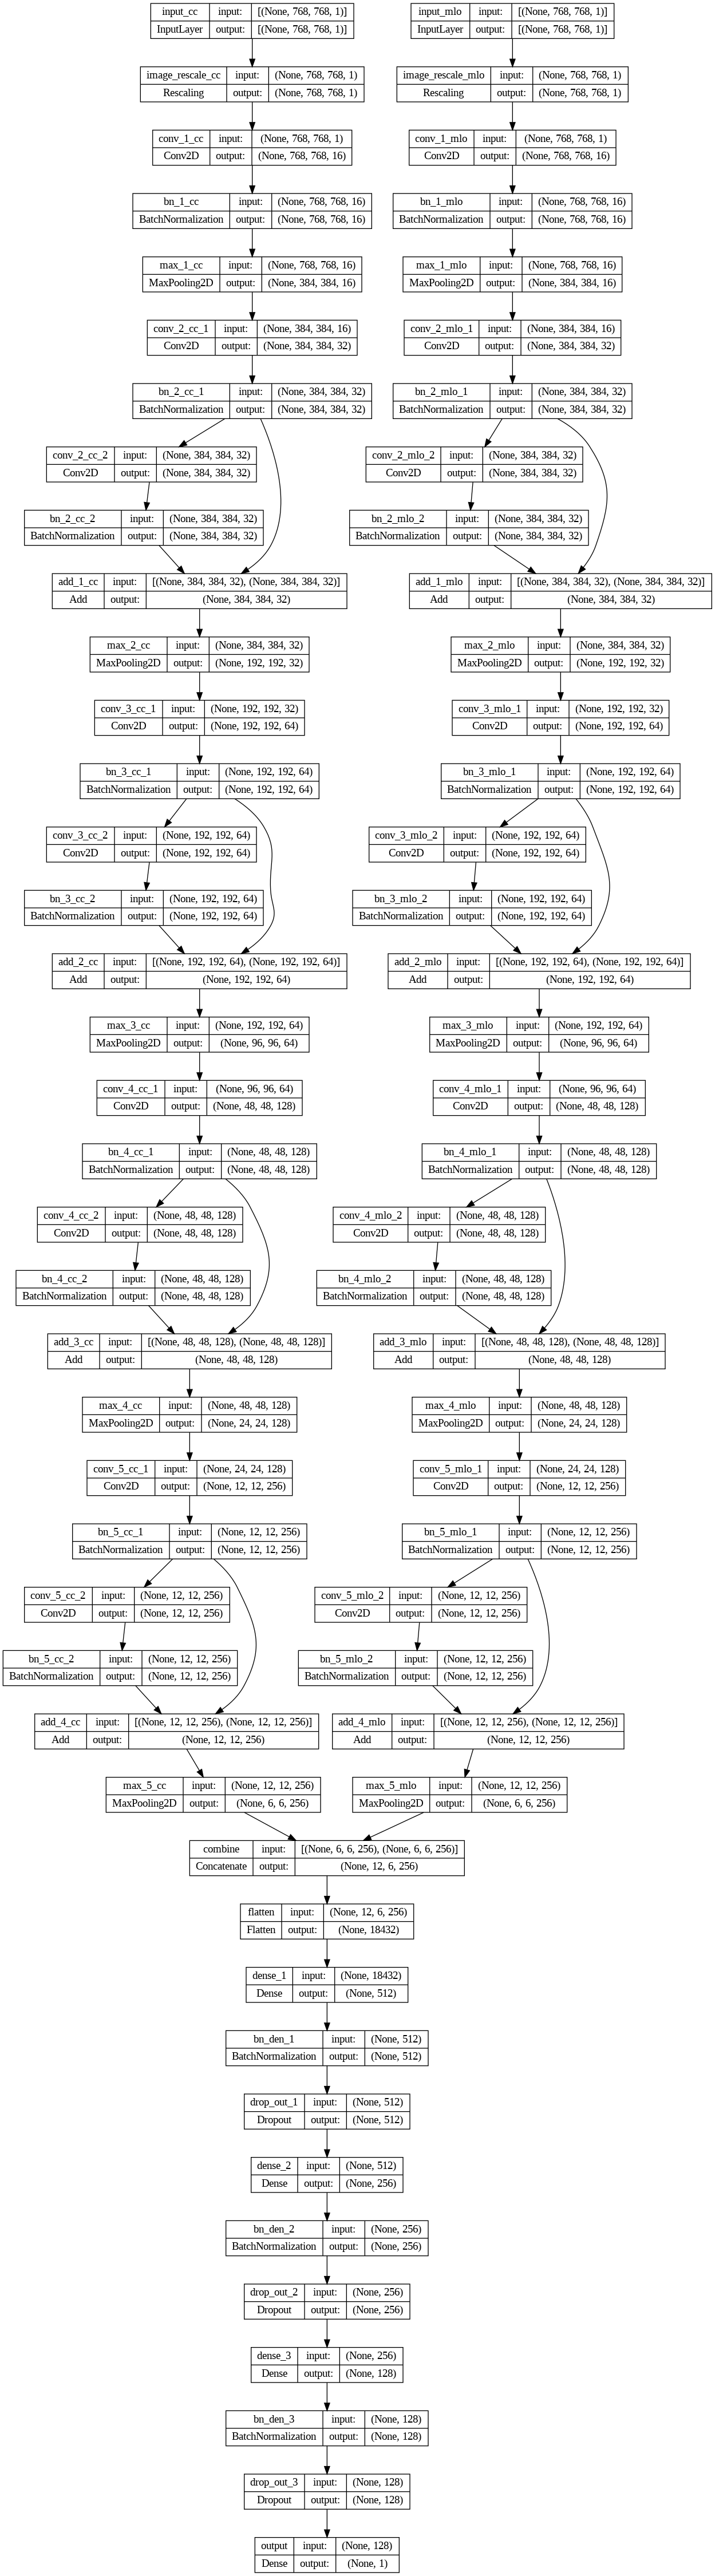

In [30]:
tf.keras.utils.plot_model(model_v_d22, to_file = dot_img_file, show_shapes = True, rankdir = "TB")

## Define Directory Paths
- train_path contains the training images.
- validation_path contains the validation images.
- test_path contains the testing images.
- Split ratio are:
    * Training: 75%
    * Validation: 15%
    * Testing: 10%

In [31]:
# CC View
train_path_cc = "/content/drive/MyDrive/Colab Notebooks/RSNA_PNG_Mammograms_Split/train_img/cc/"
validation_path_cc = "/content/drive/MyDrive/Colab Notebooks/RSNA_PNG_Mammograms_Split/val_img/cc/"
test_path_cc = "/content/drive/MyDrive/Colab Notebooks/RSNA_PNG_Mammograms_Split/test_img/cc/"

# MLO View
train_path_mlo = "/content/drive/MyDrive/Colab Notebooks/RSNA_PNG_Mammograms_Split/train_img/mlo/"
validation_path_mlo = "/content/drive/MyDrive/Colab Notebooks/RSNA_PNG_Mammograms_Split/val_img/mlo/"
test_path_mlo = "/content/drive/MyDrive/Colab Notebooks/RSNA_PNG_Mammograms_Split/test_img/mlo/"

## Set Batch Size

## Using ImageDataGenerator to Read Images from Directories

In [32]:
# Create a generator for the training images - cc view
train_generator_cc = image_dataset_from_directory(train_path_cc,
                                                  shuffle = True,
                                                  seed = shuf_seed,
                                                  image_size = (size_h, size_w),
                                                  interpolation = inter_pol,
                                                  color_mode = "grayscale",
                                                  batch_size = bch_size,
                                                  label_mode = "binary")

Found 1505 files belonging to 2 classes.


In [33]:
# Create a generator for the training images - mlo view
train_generator_mlo = image_dataset_from_directory(train_path_mlo,
                                                   shuffle = True,
                                                   seed = shuf_seed,
                                                   image_size = (size_h, size_w),
                                                   interpolation = inter_pol,
                                                   color_mode = "grayscale",
                                                   batch_size = bch_size,
                                                   label_mode = "binary")

Found 1505 files belonging to 2 classes.


In [34]:
# Create a generator for the validation images - cc view
validation_generator_cc = image_dataset_from_directory(validation_path_cc,
                                                       shuffle = False,
                                                       image_size = (size_h, size_w),
                                                       interpolation = inter_pol,
                                                       color_mode = "grayscale",
                                                       batch_size = bch_size,
                                                       label_mode = "binary")

Found 300 files belonging to 2 classes.


In [35]:
# Create a generator for the validation images - mlo view
validation_generator_mlo = image_dataset_from_directory(validation_path_mlo,
                                                        shuffle = False,
                                                        image_size = (size_h, size_w),
                                                        interpolation = inter_pol,
                                                        color_mode = "grayscale",
                                                        batch_size = bch_size,
                                                        label_mode = "binary")

Found 300 files belonging to 2 classes.


In [36]:
# Create a generator for the testing images - cc view
test_generator_cc = image_dataset_from_directory(test_path_cc,
                                                 shuffle = False,
                                                 image_size = (size_h, size_w),
                                                 interpolation = inter_pol,
                                                 color_mode = "grayscale",
                                                 batch_size = bch_size,
                                                 label_mode = "binary")

Found 202 files belonging to 2 classes.


In [37]:
# Create a generator for the testing images - mlo view
test_generator_mlo = image_dataset_from_directory(test_path_mlo,
                                                  shuffle = False,
                                                  image_size = (size_h, size_w),
                                                  interpolation = inter_pol,
                                                  color_mode = "grayscale",
                                                  batch_size = bch_size,
                                                  label_mode = "binary")

Found 202 files belonging to 2 classes.


## Inspect the Data

Class names:  ['cancer', 'no_cancer']
Class names:  ['cancer', 'no_cancer']
Label dtype: <dtype: 'float32'>
Labels: [[1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


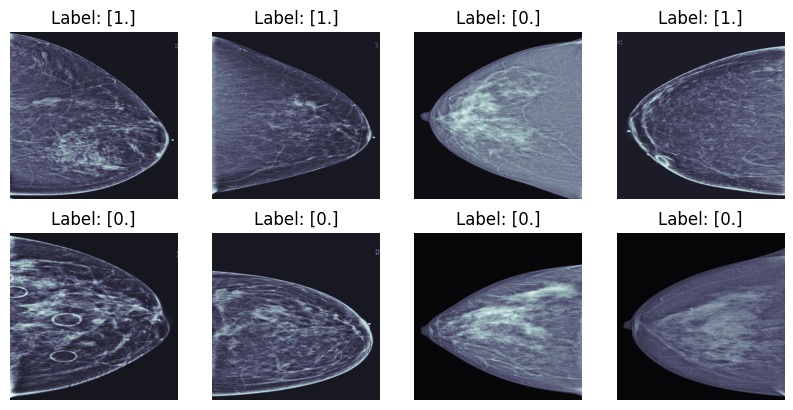

Label dtype: <dtype: 'float32'>
Labels: [[1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


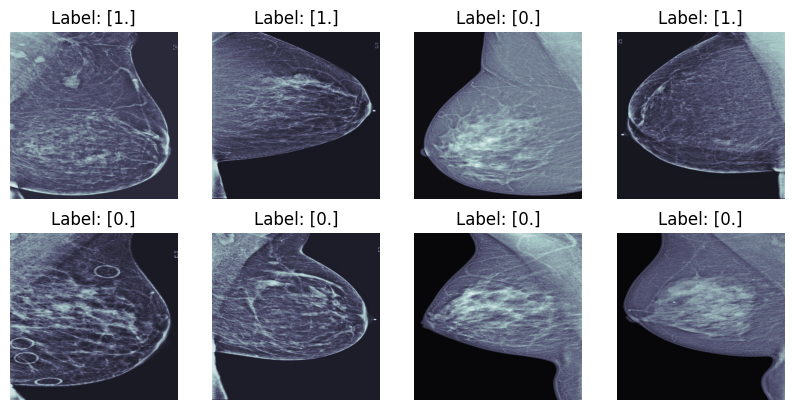

In [38]:
# Print the class names
print("Class names: ", train_generator_cc.class_names)
print("Class names: ", train_generator_mlo.class_names)

# Inspect a batch of images and labels
def inspect_data(generator, num_batches = 1):
    for images, labels in generator.take(num_batches):
        print("Label dtype:", labels.dtype)
        print("Labels:", labels.numpy())
        plt.figure(figsize = (10, 10))
        for i in range(len(images)):
            ax = plt.subplot(4, 4, i + 1)
            plt.imshow(images[i].numpy().squeeze(), cmap = "bone")
            plt.title(f"Label: {labels[i].numpy()}")
            plt.axis("off")
        plt.show()

inspect_data(train_generator_cc)
inspect_data(train_generator_mlo)

In [39]:
for data_batch, labels_batch in train_generator_cc:
    print("Data batch shape: ", data_batch.shape)
    print("Labels batch shape: ", labels_batch.shape)
    break

Data batch shape:  (8, 768, 768, 1)
Labels batch shape:  (8, 1)


## Early Stopping
Interrupting training when the validation loss is no longer improving.

In [40]:
# Create the early stopping callback
early_stop = EarlyStopping(monitor = "val_AUC",
                           patience = 14,
                           restore_best_weights = True,
                           verbose = 1)

## Reduce Learning Rate on Plateau
Reduce learning rate when a metric has stopped improving.

In [41]:
reduce_lr = ReduceLROnPlateau(monitor = "val_AUC",
                              factor = 0.2,
                              patience = 8,
                              min_lr = 3e-9,
                              verbose = 1)

## Model Checkpoint
Save the current weights of the model at different points during training.

In [42]:
# Create the model check callback
model_check = ModelCheckpoint(filepath = "/content/drive/MyDrive/Colab Notebooks/logs_model/model_v_d22.h5",
                              monitor = "val_loss",
                              save_best_only = True)

## TensorBoard
TensorBoard provides the visualization and tooling.

In [43]:
file_name = "model_v_d22"

In [44]:
tensorboard_callback = TensorBoard(log_dir = "/content/drive/MyDrive/Colab Notebooks/logs_tensorboard/{}".format(file_name), histogram_freq = 1)

## Configuring the Model

In [45]:
# Compile the model
model_v_d22.compile(loss = losses.BinaryCrossentropy(label_smoothing = 0.6),
                   optimizer = optimizers.Adam(
                       learning_rate = 3e-3,
                       use_ema = True,
                       ema_momentum = 0.4),
                   metrics = [metrics.BinaryAccuracy(name = "accuracy"),
                              metrics.Precision(name = "precision"),
                              metrics.Recall(name = "recall"),
                              metrics.AUC(name = "AUC"),
                              metrics.AUC(name = "PRC", curve = "PR")])

## To Prevent the Following:
- Mismatch found in batch 0
- Labels cc view: [0 0 0 1 0 1 0 0]
- Labels mlo view: [0 1 0 0 1 0 1 0]

#### Please rerun the following cells.

In [46]:
# Create a generator for the training images - cc view
train_generator_cc = image_dataset_from_directory(train_path_cc,
                                                  shuffle = True,
                                                  seed = shuf_seed,
                                                  image_size = (size_h, size_w),
                                                  interpolation = inter_pol,
                                                  color_mode = "grayscale",
                                                  batch_size = bch_size,
                                                  label_mode = "binary")

Found 1505 files belonging to 2 classes.


In [47]:
# Create a generator for the training images - mlo view
train_generator_mlo = image_dataset_from_directory(train_path_mlo,
                                                   shuffle = True,
                                                   seed = shuf_seed,
                                                   image_size = (size_h, size_w),
                                                   interpolation = inter_pol,
                                                   color_mode = "grayscale",
                                                   batch_size = bch_size,
                                                   label_mode = "binary")

Found 1505 files belonging to 2 classes.


In [48]:
# Create a generator for the validation images - cc view
validation_generator_cc = image_dataset_from_directory(validation_path_cc,
                                                       shuffle = False,
                                                       image_size = (size_h, size_w),
                                                       interpolation = inter_pol,
                                                       color_mode = "grayscale",
                                                       batch_size = bch_size,
                                                       label_mode = "binary")

Found 300 files belonging to 2 classes.


In [49]:
# Create a generator for the validation images - mlo view
validation_generator_mlo = image_dataset_from_directory(validation_path_mlo,
                                                        shuffle = False,
                                                        image_size = (size_h, size_w),
                                                        interpolation = inter_pol,
                                                        color_mode = "grayscale",
                                                        batch_size = bch_size,
                                                        label_mode = "binary")

Found 300 files belonging to 2 classes.


In [50]:
# Create a generator for the testing images - cc view
test_generator_cc = image_dataset_from_directory(test_path_cc,
                                                 shuffle = False,
                                                 image_size = (size_h, size_w),
                                                 interpolation = inter_pol,
                                                 color_mode = "grayscale",
                                                 batch_size = bch_size,
                                                 label_mode = "binary")

Found 202 files belonging to 2 classes.


In [51]:
# Create a generator for the testing images - mlo view
test_generator_mlo = image_dataset_from_directory(test_path_mlo,
                                                  shuffle = False,
                                                  image_size = (size_h, size_w),
                                                  interpolation = inter_pol,
                                                  color_mode = "grayscale",
                                                  batch_size = bch_size,
                                                  label_mode = "binary")

Found 202 files belonging to 2 classes.


## Training the Model

In [52]:
class double_generator(Sequence):
    def __init__(self, dataset_cc, dataset_mlo, batch_size):
        self.dataset_cc = dataset_cc
        self.dataset_mlo = dataset_mlo
        self.batch_size = batch_size
        self.cc_batches = list(dataset_cc.as_numpy_iterator())
        self.mlo_batches = list(dataset_mlo.as_numpy_iterator())

    def __len__(self):
        return min(len(self.cc_batches), len(self.mlo_batches))

    def __getitem__(self, idx):
        batch_cc = self.cc_batches[idx]
        batch_mlo = self.mlo_batches[idx]

        # Get the images and labels of each view
        images_cc, labels_cc = batch_cc
        images_mlo, labels_mlo = batch_mlo

        # Debugging: Print the labels to check for mismatch
        if not np.array_equal(labels_cc, labels_mlo):
            print(f"Mismatch found in batch {idx}")
            print(f"Labels cc view: {labels_cc}")
            print(f"Labels mlo view: {labels_mlo}")

        # Ensure the labels match
        assert np.array_equal(labels_cc, labels_mlo), "Labels do not match between datasets"

        # Return the images of the cc and mlo view as well as the labels of cc, which is the same as mlo's
        return [images_cc, images_mlo], labels_cc

In [53]:
# Training
train_generator = double_generator(train_generator_cc, train_generator_mlo, bch_size)

# Validation
validation_generator = double_generator(validation_generator_cc, validation_generator_mlo, bch_size)

In [54]:
# Fit the model
history = model_v_d22.fit(train_generator,
                          epochs = 13,
                          batch_size = bch_size,
                          validation_data = validation_generator,
                          validation_batch_size = bch_size,
                          callbacks = [early_stop,
                                       reduce_lr,
                                       model_check,
                                       tensorboard_callback])

Epoch 1/13
189/189 [==============================] - ETA: 0s - loss: 0.8007 - accuracy: 0.5482 - precision: 0.5335 - recall: 0.5247 - AUC: 0.5609 - PRC: 0.5372

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


189/189 [==============================] - 526s 3s/step - loss: 0.8007 - accuracy: 0.5482 - precision: 0.5335 - recall: 0.5247 - AUC: 0.5609 - PRC: 0.5372 - val_loss: 0.6980 - val_accuracy: 0.5133 - val_precision: 0.4949 - val_recall: 0.3379 - val_AUC: 0.5283 - val_PRC: 0.5281 - lr: 0.0030
Epoch 2/13
189/189 [==============================] - 514s 3s/step - loss: 0.7141 - accuracy: 0.5648 - precision: 0.5519 - recall: 0.5330 - AUC: 0.5868 - PRC: 0.5707 - val_loss: 0.7860 - val_accuracy: 0.5200 - val_precision: 1.0000 - val_recall: 0.0069 - val_AUC: 0.5860 - val_PRC: 0.6020 - lr: 0.0030
Epoch 3/13
189/189 [==============================] - 514s 3s/step - loss: 0.6933 - accuracy: 0.6086 - precision: 0.6024 - recall: 0.5618 - AUC: 0.6590 - PRC: 0.6210 - val_loss: 0.7078 - val_accuracy: 0.5433 - val_precision: 0.5230 - val_recall: 0.6276 - val_AUC: 0.5657 - val_PRC: 0.5560 - lr: 0.0030
Epoch 4/13
189/189 [==============================] - 516s 3s/step - loss: 0.6859 - accuracy: 0.6365 - pr

## Call the Tensorboard

#### By using the following commands in the Anaconda Prompt(mini):
- conda activate tensorflowIO
- cd C:\Users\miche\Desktop\CM3070 Final Project Code
-
tensorboard --logdir logs_tensorboard/model_demo

## Save the Model

In [55]:
# Save model
model_v_d22.save("/content/drive/MyDrive/Colab Notebooks/logs_model/model_v_d22.h5")

## Evaluating the Model

### Evaluate using Accuracy and Loss on Training and Validation Files

In [56]:
print(history.params)

{'verbose': 1, 'epochs': 13, 'steps': 189}


In [57]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'AUC', 'PRC', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_AUC', 'val_PRC', 'lr'])


In [58]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

precision = history.history["precision"]
val_precision = history.history["val_precision"]

recall = history.history["recall"]
val_recall = history.history["val_recall"]

AUC = history.history["AUC"]
val_AUC = history.history["val_AUC"]

PRC = history.history["PRC"]
val_PRC = history.history["val_PRC"]

In [59]:
epochs = range(1, len(accuracy) + 1)

In [60]:
# Set the style of the plots
plt.style.use("seaborn-v0_8-darkgrid")

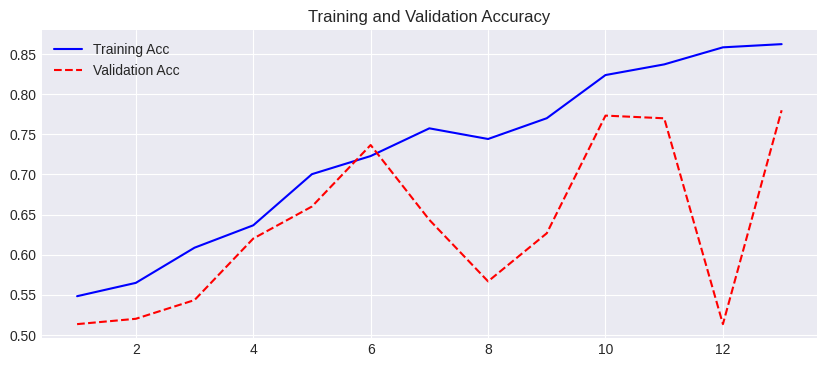

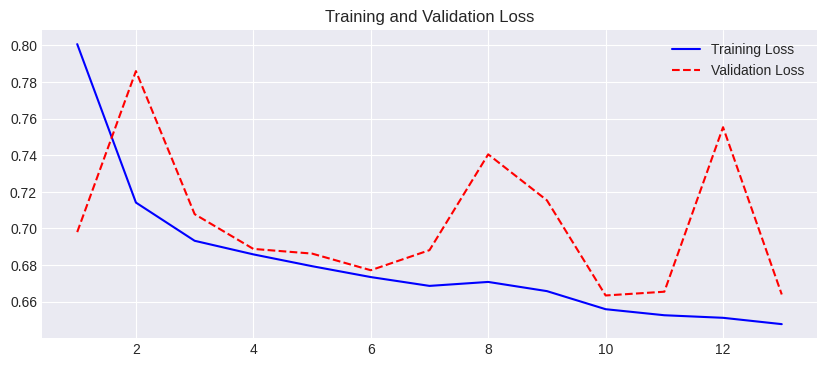

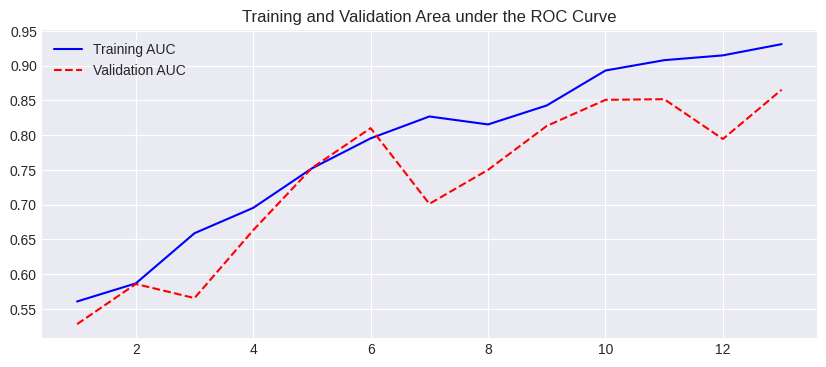

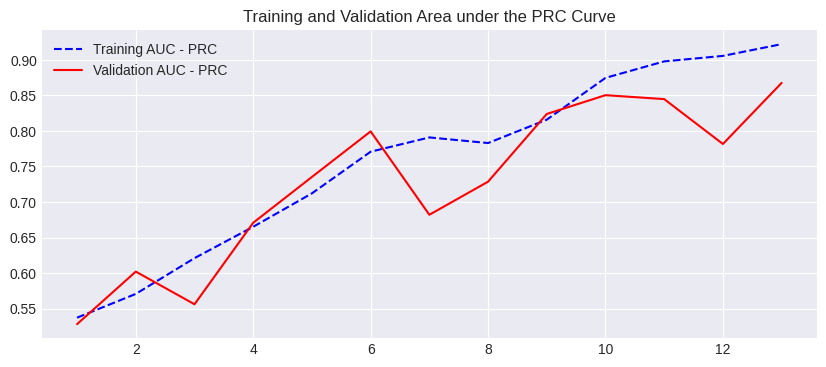

In [61]:
# -------------------------------------------------
# Make the plot - Accuracy
plt.figure(figsize = (10, 4))

# Define the different values
plt.plot(epochs, accuracy, "b", label = "Training Acc")
plt.plot(epochs, val_accuracy, "r--", label = "Validation Acc")

# Adding title and legend
plt.title("Training and Validation Accuracy")
plt.legend()

# -------------------------------------------------
# Make the plot - Loss
plt.figure(figsize = (10, 4))

# Define the different values
plt.plot(epochs, loss, "b", label = "Training Loss")
plt.plot(epochs, val_loss, "r--", label = "Validation Loss")

# Adding title and legend
plt.title("Training and Validation Loss")
plt.legend()


# -------------------------------------------------
# Make the plot - AUC
plt.figure(figsize = (10, 4))

# Define the different values
plt.plot(epochs, AUC, "b", label = "Training AUC")
plt.plot(epochs, val_AUC, "r--", label = "Validation AUC")

# Adding title and legend
plt.title("Training and Validation Area under the ROC Curve")
plt.legend()

# Show the plots
plt.show()


# -------------------------------------------------
# Make the plot - AUC PRC
plt.figure(figsize = (10, 4))

# Define the different values
plt.plot(epochs, PRC, "b--", label = "Training AUC - PRC")
plt.plot(epochs, val_PRC, "r", label = "Validation AUC - PRC")

# Adding title and legend
plt.title("Training and Validation Area under the PRC Curve")
plt.legend()

# Show the plots
plt.show()

In [62]:
model_v_d22.metrics_names

['loss', 'accuracy', 'precision', 'recall', 'AUC', 'PRC']

### Evaluate using Confusion Matrix on Testing Files - CC View

In [63]:
test_generator = double_generator(test_generator_cc, test_generator_mlo, bch_size)

In [64]:
# Evaluate the model
test_loss, test_accuracy, test_precision, test_recall, test_auc, test_PRC = model_v_d22.evaluate(test_generator)

# Print the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test AUC: {test_auc}")
print(f"Test PRC: {test_PRC}")

26/26 [==============================] - 14s 522ms/step - loss: 0.6782 - accuracy: 0.8069 - precision: 0.8933 - recall: 0.6837 - AUC: 0.8831 - PRC: 0.8942
Test Loss: 0.6782400012016296
Test Accuracy: 0.8069307208061218
Test Precision: 0.8933333158493042
Test Recall: 0.6836734414100647
Test AUC: 0.8831436634063721
Test PRC: 0.8941909670829773


In [65]:
# Make predictions
predictions_probs = model_v_d22.predict(test_generator)

# Print the first 10 predictions probabilities
print(predictions_probs[:10])

26/26 [==============================] - 14s 526ms/step
[[0.283675  ]
 [0.22824992]
 [0.41534957]
 [0.36105534]
 [0.297284  ]
 [0.27762032]
 [0.46453837]
 [0.46189466]
 [0.40047026]
 [0.45558912]]


In [66]:
# Create a predictions lists of True and False from the predictions probabilities
predictions = predictions_probs > 0.5

# Print the first 10 predictions
print(predictions[:10])

[[False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]]


In [67]:
# Convert predictions to binary labels
predicted_labels = (predictions_probs > 0.50).astype(int)

In [68]:
# Get the true labels from the test generator
true_labels = []

for idx in range(len(test_generator)):
    _, labels = test_generator[idx]
    true_labels.extend(labels)

true_labels = np.array(true_labels)

In [69]:
# Generate the classification report
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

         0.0       0.76      0.92      0.83       104
         1.0       0.89      0.68      0.77        98

    accuracy                           0.81       202
   macro avg       0.82      0.80      0.80       202
weighted avg       0.82      0.81      0.80       202



In [70]:
# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
cm

array([[96,  8],
       [31, 67]])

In [71]:
# Get class labels from the generator
class_labels = list(test_generator_cc.class_names)

# Show the class_labels
class_labels

['cancer', 'no_cancer']

### Confusion Matrix as a Heatmap

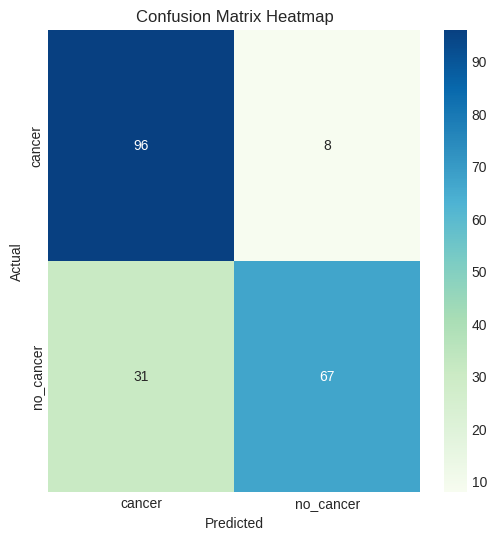

In [72]:
# Make the plot
plt.figure(figsize = (6, 6))

# Plotting
sns.heatmap(cm,
            annot = True,
            cmap = "GnBu",
            fmt = "g",
            xticklabels = class_labels,
            yticklabels = class_labels)

# Adding labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")

# Show plot
plt.show()

In [79]:
# Convert predictions to binary labels
predicted_labels_t = (predictions_probs > 0.46).astype(int)

In [80]:
# Get the true labels from the test generator
true_labels_t = []

for idx in range(len(test_generator)):
    _, labels = test_generator[idx]
    true_labels_t.extend(labels)

true_labels_t = np.array(true_labels)

In [81]:
# Generate the classification report
report_t = classification_report(true_labels_t, predicted_labels_t)
print(report)

              precision    recall  f1-score   support

         0.0       0.76      0.92      0.83       104
         1.0       0.89      0.68      0.77        98

    accuracy                           0.81       202
   macro avg       0.82      0.80      0.80       202
weighted avg       0.82      0.81      0.80       202



In [82]:
# Compute the confusion matrix
cm = confusion_matrix(true_labels_t, predicted_labels_t)
cm

array([[87, 17],
       [24, 74]])

In [83]:
# Get class labels from the generator
class_labels = list(test_generator_cc.class_names)

# Show the class_labels
class_labels

['cancer', 'no_cancer']

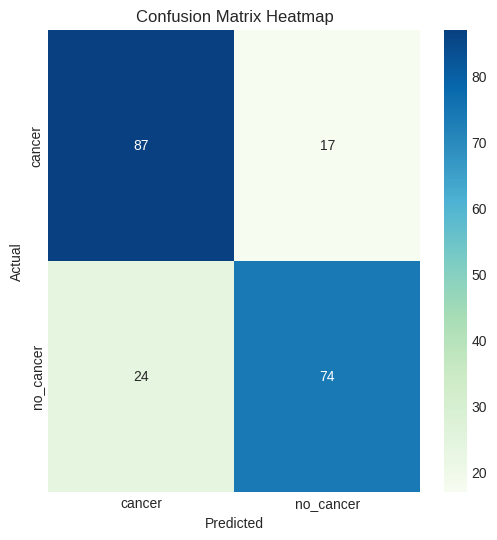

In [84]:
# Make the plot
plt.figure(figsize = (6, 6))

# Plotting
sns.heatmap(cm,
            annot = True,
            cmap = "GnBu",
            fmt = "g",
            xticklabels = class_labels,
            yticklabels = class_labels)

# Adding labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")

# Show plot
plt.show()